In [34]:
#Import packages
import geopandas as gpd
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"C:/Users/lalit/OneDrive - The University of Auckland/Masters (23)/RiskScape/Transect_Exports/CapeEgmont_TEST_intersect2.shp"
'Z:/Lalita/South Taranaki/CapeEgmont/CapeEgmont_DSAS.shp'

In [35]:
#Load shapefile
TestPoints = gpd.read_file("Z:/Lalita/South Taranaki/Manutahi/Manutahi_DSAS_intersects.shp")

#View shapefile table
TestPoints

ERROR:fiona._env:PROJ: proj_identify: C:\Users\lalit\anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR:fiona._env:PROJ: proj_identify: C:\Users\lalit\anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


OBJECTID  TransectID  TransOrder  BaselineID  ShorelineI   Distance  \
0            1           1           1           1  08/05/1951  43.556312   
1            2           1           1           1  07/09/1967  37.354738   
2            3           1           1           1  04/02/1982  27.596812   
3            4           1           1           1  21/11/2017  17.660937   
4            5           1           1           1  07/03/2022  10.300424   
...        ...         ...         ...         ...         ...        ...   
3721      3724         817         817           1  08/05/1951  18.534410   
3722      3725         817         817           1  07/09/1967  17.369798   
3723      3726         817         817           1  04/02/1982  16.900225   
3724      3727         817         817           1  21/11/2017  19.237624   
3725      3728         817         817           1  07/03/2022  11.257682   

        IntersectX    IntersectY  Uncertaint       AOI  \
0     1.715818e+06  5.609438e+06    3.206634  Manutahi   
1     1.715821e+06  5.609444e+06    3.508404  Manutahi   
2     1.715825e+06  5.609452e+06    4.025668  Manutahi   
3     1.715830e+06  5.609461e+06    2.091626  Manutahi   
4     1.715834e+06  5.609467e+06    2.411182  Manutahi   
...            ...           ...         ...       ...   
3721  1.715252e+06  5.610039e+06    3.206634  Manutahi   
3722  1.715252e+06  5.610039e+06    3.508404  Manutahi   
3723  1.715253e+06  5.610040e+06    4.025668  Manutahi   
3724  1.715251e+06  5.610038e+06    2.091626  Manutahi   
3725  1.715257e+06  5.610043e+06    2.411182  Manutahi   

                             geometry  
0     POINT (1715817.541 5609438.141)  
1     POINT (1715820.556 5609443.561)  
2     POINT (1715825.299 5609452.088)  
3     POINT (1715830.129 5609460.771)  
4     POINT (1715833.707 5609467.204)  
...                               ...  
3721  POINT (1715251.520 5610038.589)  
3722  POINT (1715252.443 5610039.299)  
3723  POINT (1715252.816 5610039.585)  
3724  POINT (1715250.963 5610038.160)  
3725  POINT (1715257.288 5610043.026)  

[3726 rows x 11 columns]

In [36]:
#Adding a new column with 1950 as the base date for all
TestPoints['BaseDate']= '1/1/1950'
TestPoints['BaseDate']=pd.to_datetime(TestPoints['BaseDate'])

#Adding new column and converts to datetime
TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'])

# Finding the number of days between base date 1950 and the respective row date
TestPoints['ElapsedTime']=TestPoints.Date - TestPoints.BaseDate

#Adding another row with Date in 2100
TestPoints['to2100']='1/1/2100'

#Convert to datetime
TestPoints['to2100']=pd.to_datetime(TestPoints['to2100'])

#Finding number of days to 2100
TestPoints['Future'] = TestPoints.to2100 - TestPoints.Date

C:\Users\lalit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


In [37]:
#View top of shaefile table
TestPoints.head(8)

OBJECTID  TransectID  TransOrder  BaselineID  ShorelineI   Distance  \
0         1           1           1           1  08/05/1951  43.556312   
1         2           1           1           1  07/09/1967  37.354738   
2         3           1           1           1  04/02/1982  27.596812   
3         4           1           1           1  21/11/2017  17.660937   
4         5           1           1           1  07/03/2022  10.300424   
5         6           2           2           1  08/05/1951  43.098978   
6         7           2           2           1  07/09/1967  37.960148   
7         8           2           2           1  04/02/1982  30.834524   

     IntersectX    IntersectY  Uncertaint       AOI  \
0  1.715818e+06  5.609438e+06    3.206634  Manutahi   
1  1.715821e+06  5.609444e+06    3.508404  Manutahi   
2  1.715825e+06  5.609452e+06    4.025668  Manutahi   
3  1.715830e+06  5.609461e+06    2.091626  Manutahi   
4  1.715834e+06  5.609467e+06    2.411182  Manutahi   
5  1.715825e+06  5.609432e+06    3.206634  Manutahi   
6  1.715828e+06  5.609436e+06    3.508404  Manutahi   
7  1.715831e+06  5.609442e+06    4.025668  Manutahi   

                          geometry   BaseDate       Date ElapsedTime  \
0  POINT (1715817.541 5609438.141) 1950-01-01 1951-08-05    581 days   
1  POINT (1715820.556 5609443.561) 1950-01-01 1967-07-09   6398 days   
2  POINT (1715825.299 5609452.088) 1950-01-01 1982-04-02  11779 days   
3  POINT (1715830.129 5609460.771) 1950-01-01 2017-11-21  24796 days   
4  POINT (1715833.707 5609467.204) 1950-01-01 2022-07-03  26481 days   
5  POINT (1715825.095 5609431.641) 1950-01-01 1951-08-05    581 days   
6  POINT (1715827.586 5609436.135) 1950-01-01 1967-07-09   6398 days   
7  POINT (1715831.040 5609442.368) 1950-01-01 1982-04-02  11779 days   

      to2100     Future  
0 2100-01-01 54206 days  
1 2100-01-01 48389 days  
2 2100-01-01 43008 days  
3 2100-01-01 29991 days  
4 2100-01-01 28306 days  
5 2100-01-01 54206 days  
6 2100-01-01 48389 days  
7 2100-01-01 43008 days

In [38]:
# New DataFrame with only latest X/Y coordinates for TestPoints
TestPoints_latest = TestPoints.sort_values('Date', ascending = False)
TestPoints_latest = TestPoints_latest.drop_duplicates('TransectID')

TestPoints_latest

OBJECTID  TransectID  TransOrder  BaselineID  ShorelineI   Distance  \
3725      3728         817         817           1  07/03/2022  11.257682   
793        794         160         160           1  07/03/2022  10.501801   
2308      2204         482         482           1  07/03/2022   9.279592   
748        749         151         151           1  07/03/2022   8.578734   
2303      2199         481         481           1  07/03/2022   9.995975   
...        ...         ...         ...         ...         ...        ...   
2870      2871         633         633           1  21/11/2017   7.133038   
2185      1731         364         364           1  21/11/2017  44.654904   
2188      1734         368         368           1  21/11/2017  13.268509   
1214      1215         246         246           1  21/11/2017  11.891514   
1218      1219         247         247           1  21/11/2017  11.220816   

        IntersectX    IntersectY  Uncertaint       AOI  \
3725  1.715257e+06  5.610043e+06    2.411182  Manutahi   
793   1.716757e+06  5.608234e+06    2.411182  Manutahi   
2308  1.718438e+06  5.605775e+06    2.411182  Manutahi   
748   1.716706e+06  5.608309e+06    2.411182  Manutahi   
2303  1.718437e+06  5.605785e+06    2.411182  Manutahi   
...            ...           ...         ...       ...   
2870  1.719131e+06  5.604525e+06    2.091626  Manutahi   
2185  1.717767e+06  5.606597e+06    2.091626  Manutahi   
2188  1.717775e+06  5.606589e+06    2.091626  Manutahi   
1214  1.717202e+06  5.607538e+06    2.091626  Manutahi   
1218  1.717213e+06  5.607537e+06    2.091626  Manutahi   

                             geometry   BaseDate       Date ElapsedTime  \
3725  POINT (1715257.288 5610043.026) 1950-01-01 2022-07-03  26481 days   
793   POINT (1716756.664 5608233.831) 1950-01-01 2022-07-03  26481 days   
2308  POINT (1718438.155 5605775.339) 1950-01-01 2022-07-03  26481 days   
748   POINT (1716706.093 5608308.940) 1950-01-01 2022-07-03  26481 days   
2303  POINT (1718437.087 5605784.893) 1950-01-01 2022-07-03  26481 days   
...                               ...        ...        ...         ...   
2870  POINT (1719130.586 5604524.652) 1950-01-01 2017-11-21  24796 days   
2185  POINT (1717767.271 5606596.991) 1950-01-01 2017-11-21  24796 days   
2188  POINT (1717774.921 5606588.867) 1950-01-01 2017-11-21  24796 days   
1214  POINT (1717202.357 5607537.686) 1950-01-01 2017-11-21  24796 days   
1218  POINT (1717212.740 5607536.506) 1950-01-01 2017-11-21  24796 days   

         to2100     Future  
3725 2100-01-01 28306 days  
793  2100-01-01 28306 days  
2308 2100-01-01 28306 days  
748  2100-01-01 28306 days  
2303 2100-01-01 28306 days  
...         ...        ...  
2870 2100-01-01 29991 days  
2185 2100-01-01 29991 days  
2188 2100-01-01 29991 days  
1214 2100-01-01 29991 days  
1218 2100-01-01 29991 days  

[808 rows x 16 columns]

In [39]:
# To view what format each variable is in and converting ElapsedTime to seconds
TestPoints['ElapsedTimeSeconds'] = TestPoints['ElapsedTime'].dt.total_seconds().astype(float)

print(TestPoints.dtypes)

OBJECTID                        int64
TransectID                      int64
TransOrder                      int64
BaselineID                      int64
ShorelineI                     object
Distance                      float64
IntersectX                    float64
IntersectY                    float64
Uncertaint                    float64
AOI                            object
geometry                     geometry
BaseDate               datetime64[ns]
Date                   datetime64[ns]
ElapsedTime           timedelta64[ns]
to2100                 datetime64[ns]
Future                timedelta64[ns]
ElapsedTimeSeconds            float64
dtype: object


     TransectID     Slope  Intercept  PredictedDistance
0             1 -0.002374  43.920816         -86.148700
1             2 -0.002270  44.506847         -79.867389
2             3 -0.002041  41.559683         -70.246142
3             4 -0.002173  40.385645         -78.676569
4             5 -0.002361  42.757084         -86.568130
..          ...       ...        ...                ...
803         813 -0.000540  24.192547          -5.413676
804         814 -0.000281  20.605068           5.193531
805         815 -0.000228  19.278651           6.798834
806         816 -0.000272  18.672310           3.754038
807         817 -0.000274  18.581865           3.547088

[808 rows x 4 columns]
Transect 1 - Distance difference: 67.20111926880487
Correlation coefficient: -0.0011870472562143164
Transect 2 - Distance difference: 64.25862205295942
Correlation coefficient: -0.001135070692661616
Transect 3 - Distance difference: 57.765084262930635
Correlation coefficient: -0.0010203681951340816
Tran

Transect 77 - Distance difference: 102.42737269472691
Correlation coefficient: -0.0018092873011857369
Transect 78 - Distance difference: 106.39970082096448
Correlation coefficient: -0.0018794549003915157
Transect 79 - Distance difference: 116.41027959505239
Correlation coefficient: -0.0020562827597515082
Transect 80 - Distance difference: 120.18556923804147
Correlation coefficient: -0.0021229698515869686
Transect 81 - Distance difference: 118.67827626027795
Correlation coefficient: -0.002096344878475905
Transect 82 - Distance difference: 118.16481351033215
Correlation coefficient: -0.0020872750213794277
Transect 83 - Distance difference: 129.42754659998533
Correlation coefficient: -0.002286221059139146
Transect 84 - Distance difference: 126.88609828756542
Correlation coefficient: -0.002241328663314587
Transect 85 - Distance difference: 108.72959933779875
Correlation coefficient: -0.0019206104595809858
Transect 86 - Distance difference: 108.09148016187157
Correlation coefficient: -0.001

Transect 171 - Distance difference: 77.35712114279633
Correlation coefficient: -0.0013664438836783076
Transect 172 - Distance difference: 77.32103918259077
Correlation coefficient: -0.001365806528343651
Transect 173 - Distance difference: 80.80045591022824
Correlation coefficient: -0.0014272672915676577
Transect 174 - Distance difference: 81.10000233386191
Correlation coefficient: -0.0014325585093948618
Transect 175 - Distance difference: 77.28656798537708
Correlation coefficient: -0.0013651976256867286
Transect 176 - Distance difference: 68.63444649370521
Correlation coefficient: -0.0012123656909083802
Transect 177 - Distance difference: 57.64133531984872
Correlation coefficient: -0.0010181822814924171
Transect 178 - Distance difference: 46.160778914976625
Correlation coefficient: -0.0008153885910226917
Transect 179 - Distance difference: 44.322382714609134
Correlation coefficient: -0.0007829149776480099
Transect 180 - Distance difference: 54.4281844685369
Correlation coefficient: -0.

Transect 259 - Distance difference: 101.22915774489034
Correlation coefficient: -0.0017881219131083577
Transect 260 - Distance difference: 93.94870204921801
Correlation coefficient: -0.001659519219409631
Transect 261 - Distance difference: 94.75809029994267
Correlation coefficient: -0.0016738163339917803
Transect 262 - Distance difference: 109.52640236960892
Correlation coefficient: -0.0019346852676041992
Transect 263 - Distance difference: 104.17511714989983
Correlation coefficient: -0.0018401596331148844
Transect 264 - Distance difference: 95.97168815347794
Correlation coefficient: -0.001695253447210449
Transect 265 - Distance difference: 94.0674295572633
Correlation coefficient: -0.0016616164339232544
Transect 266 - Distance difference: 93.64870215877835
Correlation coefficient: -0.0016542199914996523
Transect 267 - Distance difference: 89.29089230000726
Correlation coefficient: -0.0015772432046210567
Transect 268 - Distance difference: 95.21900600982184
Correlation coefficient: -0.

Transect 350 - Distance difference: 105.48308136804273
Correlation coefficient: -0.0018632636431859448
Transect 351 - Distance difference: 113.32882540486494
Correlation coefficient: -0.0020018516463800066
Transect 352 - Distance difference: 125.13397306725435
Correlation coefficient: -0.0022103789491142224
Transect 353 - Distance difference: 124.62201096723089
Correlation coefficient: -0.0022013355996472637
Transect 354 - Distance difference: 123.39974921505379
Correlation coefficient: -0.0021797454464610646
Transect 355 - Distance difference: 122.31409640194245
Correlation coefficient: -0.002160568367164956
Transect 356 - Distance difference: 121.3355901217399
Correlation coefficient: -0.002143283934885535
Transect 357 - Distance difference: 114.45967536283032
Correlation coefficient: -0.0020218270925392197
Transect 358 - Distance difference: 110.87696196242777
Correlation coefficient: -0.0019585416866111033
Transect 359 - Distance difference: 121.903964485859
Correlation coefficient

Transect 440 - Distance difference: 119.89859491665737
Correlation coefficient: -0.0021179007086246267
Transect 441 - Distance difference: 112.7867234329454
Correlation coefficient: -0.001992275903217434
Transect 442 - Distance difference: 99.96360543210743
Correlation coefficient: -0.0017657670711528903
Transect 443 - Distance difference: 90.93826384656103
Correlation coefficient: -0.001606342539506836
Transect 444 - Distance difference: 80.88740788780754
Correlation coefficient: -0.001428803219949967
Transect 445 - Distance difference: 73.9641314068763
Correlation coefficient: -0.0013065097754341181
Transect 446 - Distance difference: 65.95267534912321
Correlation coefficient: -0.0011649946186166045
Transect 447 - Distance difference: 60.51554236945276
Correlation coefficient: -0.0010689525607548358
Transect 448 - Distance difference: 72.89770920488971
Correlation coefficient: -0.0012876723875660586
Transect 449 - Distance difference: 83.14305089190525
Correlation coefficient: -0.001

Transect 526 - Distance difference: 88.5198585285713
Correlation coefficient: -0.0015636235873767274
Transect 527 - Distance difference: 84.37179987649195
Correlation coefficient: -0.0014903518666800667
Transect 528 - Distance difference: 86.53000637368106
Correlation coefficient: -0.0015284746409538804
Transect 529 - Distance difference: 89.38408305659948
Correlation coefficient: -0.0015788893354165105
Transect 530 - Distance difference: 91.02863568931284
Correlation coefficient: -0.0016079388767277758
Transect 531 - Distance difference: 95.64242386314689
Correlation coefficient: -0.0016894372900294443
Transect 532 - Distance difference: 102.02625306825051
Correlation coefficient: -0.0018022018841985885
Transect 533 - Distance difference: 98.98951216300888
Correlation coefficient: -0.001748560590740636
Transect 534 - Distance difference: 99.46075106404518
Correlation coefficient: -0.00175688460156937
Transect 535 - Distance difference: 104.18409676625245
Correlation coefficient: -0.00

Transect 608 - Distance difference: 90.66524549067566
Correlation coefficient: -0.0016015199161074627
Transect 609 - Distance difference: 97.63873246531634
Correlation coefficient: -0.0017247002837793457
Transect 610 - Distance difference: 86.38643500322573
Correlation coefficient: -0.0015259385819830727
Transect 611 - Distance difference: 95.82005713535753
Correlation coefficient: -0.0016925750218214782
Transect 612 - Distance difference: 102.18983530476461
Correlation coefficient: -0.0018050914170982231
Transect 613 - Distance difference: 87.92423609802515
Correlation coefficient: -0.0015531024535085345
Transect 614 - Distance difference: 66.06143100460531
Correlation coefficient: -0.0011669156893345106
Transect 615 - Distance difference: 78.30517218063446
Correlation coefficient: -0.0013831903515267865
Transect 616 - Distance difference: 93.73036171617281
Correlation coefficient: -0.0016556624340453051
Transect 617 - Distance difference: 87.8905959064005
Correlation coefficient: -0.

Transect 697 - Distance difference: 57.23994571493066
Correlation coefficient: -0.0010110920955792174
Transect 698 - Distance difference: 51.90121124756326
Correlation coefficient: -0.0009167881588278679
Transect 699 - Distance difference: 45.64308091020612
Correlation coefficient: -0.0008062439219636495
Transect 700 - Distance difference: 47.17631016076673
Correlation coefficient: -0.00083332703597765
Transect 701 - Distance difference: 47.99557620440618
Correlation coefficient: -0.0008477986328765311
Transect 702 - Distance difference: 47.283928026688926
Correlation coefficient: -0.000835228008667578
Transect 703 - Distance difference: 53.93609814625824
Correlation coefficient: -0.0009527326034455282
Transect 704 - Distance difference: 56.40000885126619
Correlation coefficient: -0.0009962553672589944
Transect 705 - Distance difference: 49.712723288663035
Correlation coefficient: -0.0008781304898018624
Transect 706 - Distance difference: 47.45583658244033
Correlation coefficient: -0.0

Transect 784 - Distance difference: 48.512330669008065
Correlation coefficient: -0.0008569266351481675
Transect 785 - Distance difference: 45.34178872465577
Correlation coefficient: -0.0008009218668242734
Transect 786 - Distance difference: 41.3276136934078
Correlation coefficient: -0.0007300150797252842
Transect 787 - Distance difference: 39.5495641379574
Correlation coefficient: -0.0006986074354899561
Transect 788 - Distance difference: 41.53778267534322
Correlation coefficient: -0.0007337275255306866
Transect 789 - Distance difference: 37.99031530008104
Correlation coefficient: -0.000671064708897072
Transect 790 - Distance difference: 36.16173129493534
Correlation coefficient: -0.0006387644191149464
Transect 791 - Distance difference: 37.038300152499765
Correlation coefficient: -0.0006542482186197232
Transect 792 - Distance difference: 35.35753043010155
Correlation coefficient: -0.0006245589350332357
Transect 793 - Distance difference: 35.55090377345431
Correlation coefficient: -0.0

C:\Users\lalit\AppData\Local\Temp\ipykernel_27252\2102912019.py:80: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


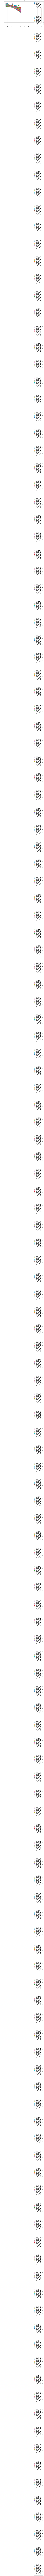

In [40]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
dates = pd.to_datetime(TestPoints['Date'])  # Replace with your date values
distances = np.array(TestPoints['Distance'])  # Replace with your distance values

# Convert datetime to numerical values (days since a reference date)
reference_date = pd.to_datetime('1950-01-01')
numerical_dates = (dates - reference_date).dt.days

# Group data by Transect ID
grouped = TestPoints.groupby('TransectID')

# Perform linear regression for each group
results = []
for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = 2 * coefficients[0]  # Multiply the slope by 2
    intercept = coefficients[1]

    # Calculate the predicted distance for the target date (2100-01-01)
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days
    predicted_distance_target = slope * numerical_target_date + intercept

    results.append({
        'TransectID': group_name,
        'Slope': slope,
        'Intercept': intercept,
        'PredictedDistance': predicted_distance_target
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Calculate the absolute difference between the predicted distances and the old distances for each Transect ID
plt.figure(figsize=(10, 6))

for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = 2 * coefficients[0]  # Multiply the slope by 2
    intercept = coefficients[1]
    
    # Calculate the predicted distance for the last old data point's date
    last_old_date = group_data['Date'].max()
    numerical_last_old_date = (last_old_date - reference_date).days
    predicted_distance_last_old = slope * numerical_last_old_date + intercept

    # Calculate the predicted distance for the target date
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days
    predicted_distance_target = slope * numerical_target_date + intercept

    # Calculate the absolute difference between the predicted distances
    distance_difference = abs(predicted_distance_last_old - predicted_distance_target)

    plt.scatter(group_data['Date'], group_data['Distance'], label=f'Transect {group_name}')
    plt.plot(group_data['Date'], slope * group_data['NumericalDate'] + intercept, label=f'Linear Fit {group_name}')
    plt.scatter(numerical_target_date, predicted_distance_target, label=f'Predicted Point {group_name}')

    print(f"Transect {group_name} - Distance difference: {distance_difference}")
    print(f"Correlation coefficient: {coefficients[0]}")

plt.xlabel('Date')
plt.ylabel('Distance')
plt.title('Date vs. Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [41]:
print(group_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5 entries, 3721 to 3725
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   OBJECTID            5 non-null      int64          
 1   TransectID          5 non-null      int64          
 2   TransOrder          5 non-null      int64          
 3   BaselineID          5 non-null      int64          
 4   ShorelineI          5 non-null      object         
 5   Distance            5 non-null      float64        
 6   IntersectX          5 non-null      float64        
 7   IntersectY          5 non-null      float64        
 8   Uncertaint          5 non-null      float64        
 9   AOI                 5 non-null      object         
 10  geometry            5 non-null      geometry       
 11  BaseDate            5 non-null      datetime64[ns] 
 12  Date                5 non-null      datetime64[ns] 
 13  ElapsedTime         5 non

In [42]:
import geopandas as gpd
from shapely.geometry import LineString

# Replace 'path_to_shapefile' with the actual path to your shapefile
shapefile_path = 'Z:/Lalita/South Taranaki/Manutahi/Manutahi_DSAS.shp'
TransectLine = gpd.read_file(shapefile_path)

#Line shapefiles have azimuth 
TransectLine

ERROR:fiona._env:PROJ: proj_identify: C:\Users\lalit\anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR:fiona._env:PROJ: proj_identify: C:\Users\lalit\anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


OBJECTID  TransectID  BaselineID  GroupID  TransOrder  Azimuth  ShrCount  \
0           1           1           1        0           1    29.08         5   
1           2           2           1        0           2    28.99         5   
2           3           3           1        0           3    29.15         5   
3           4           4           1        0           4    30.39         5   
4           5           5           1        0           5    31.55         5   
..        ...         ...         ...      ...         ...      ...       ...   
803       805         813           1        0         813    53.52         5   
804       806         814           1        0         814    53.31         5   
805       807         815           1        0         815    53.06         5   
806       808         816           1        0         816    52.77         5   
807       809         817           1        0         817    52.43         5   

        TCD  SHAPE_Leng    SCE  ...  EPRunc   LRR   LR2   LSE  LCI95_5   WLR  \
0       0.0   43.556310  33.26  ...    0.06 -0.43  0.97  2.74     0.15 -0.43   
1      10.0   43.098955  33.93  ...    0.06 -0.41  0.91  4.56     0.24 -0.40   
2      20.0   40.277825  28.21  ...    0.06 -0.37  0.96  2.59     0.14 -0.37   
3      30.0   38.856082  29.67  ...    0.06 -0.40  0.96  2.99     0.16 -0.39   
4      40.0   40.526146  31.77  ...    0.06 -0.43  0.96  3.29     0.18 -0.42   
..      ...         ...    ...  ...     ...   ...   ...   ...      ...   ...   
803  8500.0   23.756171  10.46  ...    0.06 -0.10  0.55  3.21     0.17 -0.09   
804  8510.0   20.267868   6.53  ...    0.06 -0.05  0.33  2.61     0.14 -0.05   
805  8520.0   19.504474   5.90  ...    0.06 -0.04  0.28  2.35     0.13 -0.04   
806  8530.0   19.115224   7.27  ...    0.06 -0.05  0.27  2.93     0.16 -0.04   
807  8540.0   19.237604   7.98  ...    0.06 -0.05  0.24  3.18     0.17 -0.04   

      WR2   WSE  WCI95_5                                           geometry  
0    0.96  1.09     0.16  LINESTRING (1715817.541 5609438.141, 1715838.7...  
1    0.87  2.01     0.30  LINESTRING (1715825.095 5609431.641, 1715845.9...  
2    0.95  1.06     0.16  LINESTRING (1715832.696 5609426.464, 1715852.3...  
3    0.95  1.14     0.17  LINESTRING (1715839.598 5609421.275, 1715859.2...  
4    0.95  1.25     0.19  LINESTRING (1715846.961 5609415.713, 1715868.1...  
..    ...   ...      ...                                                ...  
803  0.40  1.43     0.21  LINESTRING (1715221.101 5610066.016, 1715240.2...  
804  0.21  1.15     0.17  LINESTRING (1715229.498 5610059.708, 1715245.7...  
805  0.16  1.04     0.16  LINESTRING (1715236.912 5610052.730, 1715252.5...  
806  0.15  1.30     0.19  LINESTRING (1715244.104 5610045.576, 1715259.3...  
807  0.13  1.41     0.21  LINESTRING (1715250.963 5610038.160, 1715266.2...  

[808 rows x 22 columns]

In [43]:
import math

def calculate_new_coordinates(old_x, old_y, bearing, distance):
    bearing_radians = math.radians(bearing)
    new_x = old_x + (distance * math.sin(bearing_radians))
    new_y = old_y + (distance * math.cos(bearing_radians))
    return new_x, new_y

# Calculate New X/Y coordinates for each Transect
new_TransectLine = TransectLine[['TransectID', 'Azimuth']]
new_TransectLine = new_TransectLine.merge(TestPoints_latest[['TransectID', 'IntersectX', 'IntersectY']], on = 'TransectID')

new_TransectLine[['NewX', 'NewY']] = new_TransectLine.apply(lambda row: calculate_new_coordinates(row['IntersectX'],
                                                                                                 row['IntersectY'],
                                                                                                 row['Azimuth'],
                                                                                                 distance_difference),
                                                           axis = 1,
                                                           result_type = 'expand')

new_TransectLine = new_TransectLine.sort_values('TransectID', ascending = True)
new_TransectLine

TransectID  Azimuth    IntersectX    IntersectY          NewX  \
0             1    29.08  1.715834e+06  5.609467e+06  1.715837e+06   
1             2    28.99  1.715842e+06  5.609461e+06  1.715845e+06   
2             3    29.15  1.715846e+06  5.609451e+06  1.715850e+06   
3             4    30.39  1.715855e+06  5.609447e+06  1.715859e+06   
4             5    31.55  1.715864e+06  5.609443e+06  1.715868e+06   
..          ...      ...           ...           ...           ...   
803         813    53.52  1.715230e+06  5.610072e+06  1.715236e+06   
804         814    53.31  1.715235e+06  5.610064e+06  1.715241e+06   
805         815    53.06  1.715242e+06  5.610056e+06  1.715248e+06   
806         816    52.77  1.715250e+06  5.610050e+06  1.715256e+06   
807         817    52.43  1.715257e+06  5.610043e+06  1.715263e+06   

             NewY  
0    5.609474e+06  
1    5.609468e+06  
2    5.609458e+06  
3    5.609454e+06  
4    5.609449e+06  
..            ...  
803  5.610077e+06  
804  5.610068e+06  
805  5.610061e+06  
806  5.610055e+06  
807  5.610048e+06  

[808 rows x 6 columns]

<AxesSubplot:>

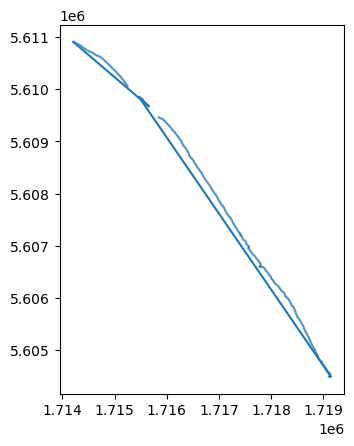

In [44]:
# Convert Dataframe to geodataframe
new_TransectLine = gpd.GeoDataFrame(new_TransectLine, geometry = gpd.points_from_xy(new_TransectLine.NewX, 
                                                                       new_TransectLine.NewY),
                                    crs = 'EPSG:2193').rename(columns = {'geometry': 'from_point'})
# Get from and to points
new_TransectLine['to_point'] = new_TransectLine.from_point.shift(-1)
new_TransectLine.loc[new_TransectLine["to_point"].isna(), "to_point"] = new_TransectLine["from_point"]

# Get Line geometry between points
new_TransectLine['geometry'] = new_TransectLine.apply(lambda row: LineString([row['from_point'], row['to_point']]),
                                                 axis = 1)
new_TransectLine.plot()

In [45]:
#Export GeoDataFrame as shapefile

new_df = new_TransectLine[['TransectID','Azimuth','geometry']]
new_df.to_file('C:/Users/lalit/OneDrive - The University of Auckland/Masters (23)/RiskScape/JupyterExports/manutahi_shapefile_double.shp')

print("Shapefile exported successfully!")

Shapefile exported successfully!
